# Disney+ Analysis

In [2]:
# load libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting
import scipy
from scipy import stats

In [6]:
# load data

In [4]:
disneydf = pd.read_csv(r"C:\Users\avama\GitHub\Repo2\Final-Project\Data\disney_plus_shows.csv")

In [5]:
disneydf.head()

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"


### Data Wranging

In [9]:
# drop superfluous columns

In [6]:
disneydf.drop(['imdb_id'], axis=1, inplace=True)
disneydf.drop(['plot'], axis=1, inplace=True)
disneydf.drop(['released_at'], axis=1, inplace=True)
disneydf.drop(['runtime'], axis=1, inplace=True)
disneydf.drop(['director'], axis=1, inplace=True)
disneydf.drop(['writer'], axis=1, inplace=True)
disneydf.drop(['actors'], axis=1, inplace=True)
disneydf.drop(['awards'], axis=1, inplace=True)
disneydf.drop(['metascore'], axis=1, inplace=True)
disneydf.drop(['imdb_votes'], axis=1, inplace=True)

In [7]:
disneydf.head()

,title,type,rated,year,added_at,genre,language,country,imdb_rating
0,10 Things I Hate About You,movie,PG-13,1999,"November 12, 2019","Comedy, Drama, Romance","English, French",USA,7.3
1,101 Dalmatian Street,series,NaN,2018–,"February 28, 2020","Animation, Comedy, Family",English,"UK, USA, Canada",6.2
2,101 Dalmatians,movie,G,1996,"November 12, 2019","Adventure, Comedy, Crime, Family","English, Spanish","USA, UK",5.7
3,101 Dalmatians 2: Patch's London Adventure,movie,G,2002,"November 12, 2019","Animation, Adventure, Comedy, Family, Musical",English,USA,5.8
4,102 Dalmatians,movie,G,2000,"November 12, 2019","Adventure, Comedy, Family",English,"USA, UK",4.9


In [12]:
# detect and remove null values

In [13]:
disneydf.isnull().sum()

title           98
type            98
rated          250
year            98
added_at         0
genre          107
language       127
country        123
imdb_rating    113
dtype: int64

In [14]:
# removing all null values

In [14]:
disneydf.dropna(inplace=True)

In [16]:
# double check for null values

In [15]:
disneydf.isnull().sum()

title          0
type           0
rated          0
year           0
added_at       0
genre          0
language       0
country        0
imdb_rating    0
dtype: int64

In [18]:
# merge columns with capitalization differences

In [16]:
disneydf['rated'] = disneydf['rated'].replace({'APPROVED':'Approved'})
disneydf['rated'] = disneydf['rated'].replace({'PASSED':'Passed'})
disneydf['rated'] = disneydf['rated'].replace({'UNRATED':'Unrated'})
disneydf['rated'] = disneydf['rated'].replace({'NOT RATED':'Not Rated'})

In [20]:
# make sure columns are together

In [17]:
disneydf.rated.unique()

array(['PG-13', 'G', 'PG', 'Approved', 'TV-G', 'Not Rated', 'TV-PG',
       'Unrated', 'TV-Y7', 'TV-Y', 'Passed', 'TV-14', 'TV-Y7-FV'],
      dtype=object)

In [ ]:
# save new csv

In [22]:
disneydf.to_csv("new_disney_shows.csv", index = False)

In [ ]:
# load new csv

In [128]:
newdisney = pd.read_csv("new_disney_shows.csv")

In [129]:
newdisney.head()

,title,type,rated,year,added_at,genre,language,country,imdb_rating
0,10 Things I Hate About You,movie,PG-13,1999,"November 12, 2019","Comedy, Drama, Romance","English, French",USA,7.3
1,101 Dalmatians,movie,G,1996,"November 12, 2019","Adventure, Comedy, Crime, Family","English, Spanish","USA, UK",5.7
2,101 Dalmatians 2: Patch's London Adventure,movie,G,2002,"November 12, 2019","Animation, Adventure, Comedy, Family, Musical",English,USA,5.8
3,102 Dalmatians,movie,G,2000,"November 12, 2019","Adventure, Comedy, Family",English,"USA, UK",4.9
4,12 Dates of Christmas,movie,PG,2011,"November 12, 2019","Comedy, Fantasy, Romance",English,USA,6.3


## Exploration

In [41]:
newdisney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        732 non-null    object 
 1   type         732 non-null    object 
 2   rated        732 non-null    object 
 3   year         732 non-null    object 
 4   added_at     732 non-null    object 
 5   genre        732 non-null    object 
 6   language     732 non-null    object 
 7   country      732 non-null    object 
 8   imdb_rating  732 non-null    float64
dtypes: float64(1), object(8)
memory usage: 51.6+ KB


In [55]:
newdisney.type.value_counts()

movie      596
series     129
episode      7
Name: type, dtype: int64

In [56]:
# Movies make up the majority of the content on Disney+

In [59]:
newdisney.added_at.value_counts()

November 12, 2019    629
April 3, 2020         16
January 1, 2020       13
October 1, 2019       11
May 1, 2020            8
April 1, 2020          6
December 1, 2019       4
December 20, 2019      3
February 1, 2020       3
February 14, 2020      3
January 10, 2020       2
March 6, 2020          2
April 10, 2020         2
March 1, 2020          2
January 15, 2020       2
April 24, 2020         2
February 2, 2020       1
March 4, 2020          1
February 7, 2020       1
November 27, 2019      1
January 28, 2020       1
March 25, 2020         1
March 13, 2020         1
December 26, 2019      1
February 9, 2020       1
April 30, 2020         1
February 16, 2020      1
December 5, 2019       1
February 21, 2020      1
January 17, 2020       1
January 8, 2020        1
May 2, 2020            1
March 15, 2020         1
March 14, 2020         1
March 5, 2020          1
January 22, 2020       1
November 29, 2019      1
February 28, 2020      1
March 20, 2020         1
February 5, 2020       1


In [76]:
# most programming was added November 12, 2019, which is when the service originally launched
# April 3, 2020 is second with 16
# Most dates only have one item released

In [85]:
newdisney.year.value_counts()

2003         27
2002         22
2000         22
2011         22
2005         22
             ..
2006–2013     1
1992–1993     1
2014–2017     1
1993–1994     1
2008–2009     1
Name: year, Length: 170, dtype: int64

In [71]:
# 2003 is the most popular release year for programming

In [96]:
newdisney.language.value_counts()

English                                                      610
English, French                                               17
English, Spanish                                              16
None                                                           8
English, German                                                6
                                                            ... 
English, German, Xhosa, Russian, Romanian, Hindi               1
Hungarian, Kurdish, Hindi, English, Persian, Urdu, Arabic      1
English, French, Russian                                       1
English, Russian, Hindi                                        1
English, Mandarin, Cantonese                                   1
Name: language, Length: 68, dtype: int64

In [86]:
# English is in 4 of the top 5 listings

In [88]:
newdisney.language.str.contains('English').value_counts()

True     722
False     10
Name: language, dtype: int64

In [90]:
# English is available in all but 10 listings.

In [89]:
newdisney.language.str.contains('French').value_counts()

False    698
True      34
Name: language, dtype: int64

In [91]:
newdisney.language.str.contains('Spanish').value_counts()

False    702
True      30
Name: language, dtype: int64

In [92]:
newdisney.language.str.contains('German').value_counts()

False    717
True      15
Name: language, dtype: int64

In [105]:
# the languages listed with English in the top 5 are all represented to a much smaller degree
# French is available in 34 titles
# Spanish is available in 30
# German is available in 15

In [106]:
# English is the overall most common language on Disney+

In [135]:
newdisney.country.value_counts()

USA                                                                                                                                617
USA, Canada                                                                                                                         18
Canada, USA                                                                                                                         14
USA, UK                                                                                                                             11
UK, USA                                                                                                                              7
USA, Australia                                                                                                                       7
UK                                                                                                                                   5
USA, France                                            

In [ ]:
# USA is listed in most of the provided options

In [136]:
newdisney.country.str.contains('USA').value_counts()

True     719
False     13
Name: country, dtype: int64

In [ ]:
# 719 of the listings were produced in the USA

In [107]:
newdisney.genre.value_counts()

Comedy, Family                                          26
Comedy, Drama, Family                                   19
Animation, Adventure, Comedy, Family, Fantasy           17
Action, Adventure, Sci-Fi                               17
Documentary                                             15
                                                        ..
Family, Adventure, Comedy, Drama                         1
Family, Drama, Western                                   1
Action, Adventure, Comedy                                1
Adventure, Comedy, Crime, Family                         1
Animation, Adventure, Comedy, Crime, Family, Mystery     1
Name: genre, Length: 337, dtype: int64

In [108]:
# Comedy, Family, Drama, Animation, Adventure
# Fantasy, Action, Sci-Fi, and Documentary make up the top 5 results

In [109]:
newdisney.genre.str.contains('Comedy').value_counts()

True     442
False    290
Name: genre, dtype: int64

In [110]:
newdisney.genre.str.contains('Family').value_counts()

True     598
False    134
Name: genre, dtype: int64

In [111]:
newdisney.genre.str.contains('Drama').value_counts()

False    565
True     167
Name: genre, dtype: int64

In [112]:
newdisney.genre.str.contains('Animation').value_counts()

False    432
True     300
Name: genre, dtype: int64

In [113]:
newdisney.genre.str.contains('Adventure').value_counts()

False    399
True     333
Name: genre, dtype: int64

In [114]:
newdisney.genre.str.contains('Fantasy').value_counts()

False    501
True     231
Name: genre, dtype: int64

In [116]:
newdisney.genre.str.contains('Action').value_counts()

False    596
True     136
Name: genre, dtype: int64

In [117]:
newdisney.genre.str.contains('Sci-Fi').value_counts()

False    595
True     137
Name: genre, dtype: int64

In [118]:
newdisney.genre.str.contains('Documentary').value_counts()

False    688
True      44
Name: genre, dtype: int64

In [ ]:
# Family is the most common genre at 598 listings, while Comedy is second with 442

In [58]:
newdisney.rated.value_counts()

G            205
PG           155
TV-G         130
Approved      60
TV-Y7         40
TV-PG         39
PG-13         37
TV-Y          32
Not Rated     17
Passed         6
Unrated        5
TV-14          4
TV-Y7-FV       2
Name: rated, dtype: int64

In [119]:
# G is the most common content rating, at 205 instances

In [130]:
newdisney.imdb_rating.value_counts()

6.5    33
7.2    32
7.1    32
7.3    31
6.4    29
6.9    28
6.1    27
6.2    27
6.8    27
6.7    26
6.3    26
7.6    25
6.6    24
5.9    23
7.0    22
7.4    20
8.0    20
7.5    19
5.5    18
5.7    18
6.0    16
7.8    16
7.9    15
7.7    15
5.0    14
5.4    14
8.1    14
5.6    12
5.8    12
4.7    10
5.3    10
5.1     8
8.2     7
5.2     7
8.3     7
4.8     7
4.9     6
8.4     6
4.1     4
8.7     3
8.5     3
4.6     2
4.2     2
8.6     1
8.8     1
3.6     1
3.0     1
1.5     1
3.4     1
9.7     1
4.5     1
4.4     1
3.3     1
3.7     1
8.9     1
3.5     1
4.3     1
2.3     1
Name: imdb_rating, dtype: int64

In [ ]:
# 6.5 is most common with 33
# 7.1 and 7.2 share second with 32
# 7.3 is third with 31

In [ ]:
# average imdb_rating by type

In [137]:
newdisney.groupby(['type'])['imdb_rating'].mean()

type
episode    7.057143
movie      6.539597
series     6.898450
Name: imdb_rating, dtype: float64

In [ ]:
# average imdb_rating by content rating

In [138]:
newdisney.groupby(['rated'])['imdb_rating'].mean()

rated
Approved     7.093333
G            6.568293
Not Rated    6.641176
PG           6.469677
PG-13        7.278378
Passed       7.466667
TV-14        6.525000
TV-G         6.173846
TV-PG        6.687179
TV-Y         6.740625
TV-Y7        7.050000
TV-Y7-FV     6.750000
Unrated      6.860000
Name: imdb_rating, dtype: float64

In [139]:
# average imdb_rating by added_at

In [140]:
newdisney.groupby(['added_at'])['imdb_rating'].mean()

added_at
April 1, 2020        5.950000
April 10, 2020       7.200000
April 24, 2020       6.700000
April 3, 2020        7.112500
April 30, 2020       6.800000
December 1, 2019     6.700000
December 20, 2019    6.400000
December 26, 2019    7.000000
December 5, 2019     7.900000
February 1, 2020     6.300000
February 14, 2020    6.133333
February 16, 2020    4.700000
February 2, 2020     6.700000
February 21, 2020    5.500000
February 28, 2020    8.200000
February 5, 2020     7.800000
February 7, 2020     6.100000
February 9, 2020     5.400000
January 1, 2020      6.707692
January 10, 2020     7.300000
January 15, 2020     7.300000
January 17, 2020     5.500000
January 22, 2020     9.700000
January 28, 2020     6.900000
January 8, 2020      7.000000
March 1, 2020        6.100000
March 13, 2020       6.200000
March 14, 2020       7.000000
March 15, 2020       5.100000
March 20, 2020       6.000000
March 25, 2020       4.200000
March 4, 2020        7.300000
March 5, 2020        6.000000
M

In [141]:
# average imdb_rating by release year

In [142]:
newdisney.groupby(['year'])['imdb_rating'].mean()

year
1928     7.600000
1932     7.150000
1933     7.500000
1934     7.100000
1935     7.550000
           ...   
2018–    7.200000
2019     6.835000
2019–    7.142857
2020     6.950000
2020–    5.500000
Name: imdb_rating, Length: 170, dtype: float64

# Do content ratings affect imdb rating?

### One Way Between Subjects ANOVA

In [144]:
# import new packages

In [145]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

##### Data wrangling for the question

In [ ]:
# df for the two variables

In [148]:
disney1 = newdisney[['imdb_rating','rated']]

In [149]:
# make rated numeric

In [150]:
def recode(series):
    if series == "Approved":
        return 0
    if series == "G":
        return 1
    if series == "Not Rated":
        return 2
    if series == "PG":
        return 3
    if series == "PG-13":
        return 4
    if series == "Passed":
        return 5
    if series == "TV-14":
        return 6
    if series == "TV-G":
        return 7
    if series == "TV-PG":
        return 8
    if series == "TV-Y":
        return 9
    if series == "TV-Y7":
        return 10
    if series == "TV-Y7-FV":
        return 11
    if series == "Unrated":
        return 12
    
disney1["ratedRecode"] = disney1["rated"].apply(recode)

C:\Users\avama\AppData\Local\Temp\ipykernel_32384\1388380255.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney1["ratedRecode"] = disney1["rated"].apply(recode)


In [151]:
disney1.head()

,imdb_rating,rated,ratedRecode
0,7.3,PG-13,4
1,5.7,G,1
2,5.8,G,1
3,4.9,G,1
4,6.3,PG,3


#### Testing Assumptions

In [155]:
# test for normality

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdb_rating', ylabel='Density'>

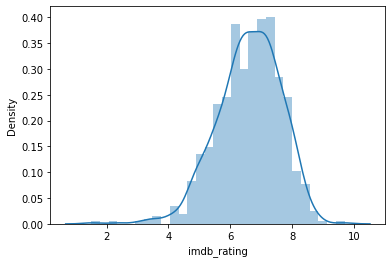

In [153]:
sns.distplot(disney1['imdb_rating'])

In [158]:
# fairly normal distribution

In [ ]:
# try SQRT

In [157]:
disney1['imdbSQRT'] = np.sqrt(disney1['imdb_rating'])

C:\Users\avama\AppData\Local\Temp\ipykernel_32384\994034267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney1['imdbSQRT'] = np.sqrt(disney1['imdb_rating'])


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdbSQRT', ylabel='Density'>

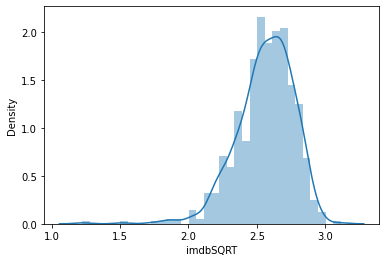

In [160]:
sns.distplot(disney1['imdbSQRT'])

In [161]:
# looks better

#### Homogeneity of Variance

In [162]:
# normal distribution-> Bartlett's Test

In [163]:
scipy.stats.bartlett(disney1['imdbSQRT'],disney1['ratedRecode'])

BartlettResult(statistic=2984.1958317072567, pvalue=0.0)

In [164]:
# violates assumption for homogeneity of variance with significant p-value

In [165]:
# Fligner's

In [166]:
scipy.stats.fligner(disney1['imdbSQRT'],disney1['ratedRecode'])

FlignerResult(statistic=439.26789658755484, pvalue=1.5623575604157676e-97)

In [ ]:
# still violates assumption

In [167]:
# they aren't closely related, but should be analyzed more

#### Sample Size Assumption

In [169]:
disney1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_rating  732 non-null    float64
 1   rated        732 non-null    object 
 2   ratedRecode  732 non-null    int64  
 3   imdbSQRT     732 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 23.0+ KB


In [170]:
# 732 is greater than 20

### Running Ananlysis

In [173]:
disney1.rated.value_counts()

G            205
PG           155
TV-G         130
Approved      60
TV-Y7         40
TV-PG         39
PG-13         37
TV-Y          32
Not Rated     17
Passed         6
Unrated        5
TV-14          4
TV-Y7-FV       2
Name: rated, dtype: int64

In [174]:
disney1.imdbSQRT.unique()

array([2.70185122, 2.38746728, 2.40831892, 2.21359436, 2.50998008,
       2.68328157, 2.60768096, 2.16794834, 2.64575131, 2.46981781,
       2.66458252, 2.04939015, 2.82842712, 2.52982213, 2.42899156,
       2.7202941 , 2.75680975, 2.48997992, 2.19089023, 2.81069386,
       2.56904652, 2.58843582, 2.77488739, 2.25831796, 2.62678511,
       2.79284801, 2.73861279, 2.32379001, 2.44948974, 2.88097206,
       2.34520788, 2.30217289, 3.1144823 , 2.84604989, 2.28035085,
       2.23606798, 2.89827535, 2.07364414, 2.14476106, 2.54950976,
       1.87082869, 2.98328678, 2.36643191, 2.86356421, 1.92353841,
       1.81659021, 1.51657509, 2.0976177 , 2.12132034, 2.02484567,
       1.84390889, 1.22474487, 1.73205081, 1.8973666 , 2.91547595,
       2.96647939, 2.93257566, 2.94957624])

In [175]:
disney1.ratedRecode.unique()

array([ 4,  1,  3,  0,  7,  2,  8, 12, 10,  9,  5,  6, 11], dtype=int64)

In [176]:
stats.f_oneway(disney1['imdb_rating'][disney1['rated']=='Approved'],
              disney1['imdb_rating'][disney1['rated']=='G'],
              disney1['imdb_rating'][disney1['rated']=='Not Rated'],
              disney1['imdb_rating'][disney1['rated']=='PG'],
              disney1['imdb_rating'][disney1['rated']=='PG-13'],
              disney1['imdb_rating'][disney1['rated']=='Passed'],
              disney1['imdb_rating'][disney1['rated']=='TV-14'],
              disney1['imdb_rating'][disney1['rated']=='TV-G'],
              disney1['imdb_rating'][disney1['rated']=='TV-PG'],
              disney1['imdb_rating'][disney1['rated']=='TV-Y'],
              disney1['imdb_rating'][disney1['rated']=='TV-Y7'],
              disney1['imdb_rating'][disney1['rated']=='TV-Y7-FV'],
              disney1['imdb_rating'][disney1['rated']=='Unrated'])

F_onewayResult(statistic=6.169820551907612, pvalue=2.1225668632488432e-10)

In [177]:
# p-value indicates there is some difference in imdb rating related to content rating

#### Tukey Post Hoc

In [178]:
postHoc = MultiComparison(disney1['imdbSQRT'],disney1['rated'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 Approved         G  -0.1098 0.0129 -0.2077 -0.0119   True
 Approved Not Rated  -0.0907 0.9152 -0.2739  0.0926  False
 Approved        PG  -0.1282 0.0021 -0.2296 -0.0268   True
 Approved     PG-13   0.0327 0.9999 -0.1067  0.1721  False
 Approved    Passed   0.0698 0.9998 -0.2157  0.3554  False
 Approved     TV-14  -0.1172 0.9959 -0.4616  0.2272  False
 Approved      TV-G  -0.1852    0.0 -0.2893 -0.0812   True
 Approved     TV-PG   -0.085 0.6924 -0.2222  0.0522  False
 Approved      TV-Y   -0.072 0.9166  -0.218  0.0739  False
 Approved     TV-Y7  -0.0127    1.0 -0.1488  0.1235  False
 Approved  TV-Y7-FV  -0.0755    1.0 -0.5549  0.4039  False
 Approved   Unrated  -0.0468    1.0 -0.3572  0.2636  False
        G Not Rated   0.0192    1.0 -0.1491  0.1875  False
        G        PG  -0.0184 0.9997 -0.0893  0.0526  Fal

#### Majority are false, indicating no significance between rating and imdb_rating

### Means and Conclusions

In [181]:
disney1.groupby('rated').mean()

,imdb_rating,ratedRecode,imdbSQRT
rated,,,
Approved,7.093333,0.0,2.662312
G,6.568293,1.0,2.552480
Not Rated,6.641176,2.0,2.571657
PG,6.469677,3.0,2.534129
PG-13,7.278378,4.0,2.695014
Passed,7.466667,5.0,2.732138
TV-14,6.525000,6.0,2.545144
TV-G,6.173846,7.0,2.477067
TV-PG,6.687179,8.0,2.577313


In [182]:
# no significant difference in imdb ratings among content rating

## How do ratings for differ between movies and series?

In [183]:
newdisney.head()

,title,type,rated,year,added_at,genre,language,country,imdb_rating
0,10 Things I Hate About You,movie,PG-13,1999,"November 12, 2019","Comedy, Drama, Romance","English, French",USA,7.3
1,101 Dalmatians,movie,G,1996,"November 12, 2019","Adventure, Comedy, Crime, Family","English, Spanish","USA, UK",5.7
2,101 Dalmatians 2: Patch's London Adventure,movie,G,2002,"November 12, 2019","Animation, Adventure, Comedy, Family, Musical",English,USA,5.8
3,102 Dalmatians,movie,G,2000,"November 12, 2019","Adventure, Comedy, Family",English,"USA, UK",4.9
4,12 Dates of Christmas,movie,PG,2011,"November 12, 2019","Comedy, Fantasy, Romance",English,USA,6.3


### Independent Chi-Square

#### Test assumptions and run analysis

### Create Contingency Table for movies

In [185]:
disneymovie_crosstab = pd.crosstab(newdisney['rated'],[newdisney.type.str.contains('movie')])

In [186]:
disneymovie_crosstab

type,False,True
rated,,
Approved,0,60
G,1,204
Not Rated,1,16
PG,0,155
PG-13,0,37
Passed,0,6
TV-14,3,1
TV-G,41,89
TV-PG,16,23


In [187]:
# most movie content is rated G or PG

#### Run Independent Chi-Square

In [188]:
stats.chi2_contingency(disneymovie_crosstab)

(439.374978028137,
 1.701112663409862e-86,
 12,
 array([[ 11.14754098,  48.85245902],
        [ 38.08743169, 166.91256831],
        [  3.15846995,  13.84153005],
        [ 28.79781421, 126.20218579],
        [  6.87431694,  30.12568306],
        [  1.1147541 ,   4.8852459 ],
        [  0.7431694 ,   3.2568306 ],
        [ 24.15300546, 105.84699454],
        [  7.24590164,  31.75409836],
        [  5.94535519,  26.05464481],
        [  7.43169399,  32.56830601],
        [  0.3715847 ,   1.6284153 ],
        [  0.92896175,   4.07103825]]))

In [189]:
# appears to be a significant relationship between rating and movies

### Create Contingency Table for Series

In [190]:
disneyseries_crosstab = pd.crosstab(newdisney['rated'],[newdisney.type.str.contains('series')])

In [191]:
disneyseries_crosstab

type,False,True
rated,,
Approved,60,0
G,204,1
Not Rated,17,0
PG,155,0
PG-13,37,0
Passed,6,0
TV-14,1,3
TV-G,90,40
TV-PG,24,15


In [192]:
# most content is rated TV-G, TV-Y7, or TV-Y

#### Run Independent Chi-Square

In [193]:
stats.chi2_contingency(disneyseries_crosstab)

(443.0806099525497,
 2.7811131497610148e-87,
 12,
 array([[ 49.42622951,  10.57377049],
        [168.87295082,  36.12704918],
        [ 14.00409836,   2.99590164],
        [127.68442623,  27.31557377],
        [ 30.4795082 ,   6.5204918 ],
        [  4.94262295,   1.05737705],
        [  3.29508197,   0.70491803],
        [107.09016393,  22.90983607],
        [ 32.12704918,   6.87295082],
        [ 26.36065574,   5.63934426],
        [ 32.95081967,   7.04918033],
        [  1.64754098,   0.35245902],
        [  4.11885246,   0.88114754]]))

In [194]:
# another significance between type and content rating

### Movies and Series appear to have different ratings that will appear in one and not the other